# Cubic anisotropy

- this notebook can be used to compute the dispersion of films with cubic anisotropy
- as an example, we choose Fe material parameters for a 20 nm thick film and compute the FMR frequency for anisotropy axes of two different orientation
- NOTE: the notebook might run for several minutes, depending on the computer/notebook computational capabilities

In [1]:
import tetrax as tx
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

## We set Fe material parameters

- anisotropy axes: (1,0,0),(0,1,0),(0,0,1)
- Note: you only have to set the first two axes, the third will be computed as a cross produc of them

In [2]:
sample = tx.create_sample(name="Fe_film",geometry="layer")
sample.Msat = 1714e3
sample.Aex = 21e-12
sample.Kc1 = 48000
sample.v1Kc = (1,0,0)
sample.v2Kc = (0,1,0)
mesh = tx.geometries.monolayer_line_trace(20,lc=1)
sample.set_geom(mesh)

This sample does not have a mesh yet. You cannot set spatially dependent saturation for it.
This sample does not have a mesh yet. You cannot set spatially dependent exchange stiffness for it.
Setting geometry and calculating discretized differential operators on mesh.
Done.


### Angular dependence of the f0 mode in the XZ plane

In [3]:
angle_ = np.linspace(0,360,181)
Bext = 300e-3
f0 = []
exp = tx.create_experimental_setup(sample,name="xz-plane")

for angle in angle_:
    sample.mag = tx.vectorfields.homogeneous(sample.xyz, angle, 0)
    exp.Bext = Bext*tx.vectorfields.homogeneous(sample.xyz, angle, 0)
    dispersion = exp.eigenmodes(num_cpus=-1,num_modes=2,k=0,save_modes=False,verbose=False)
    f0.append(dispersion.iloc[0]["f0 (GHz)"])

### Plotting XZ-plane data

<IPython.core.display.Javascript object>


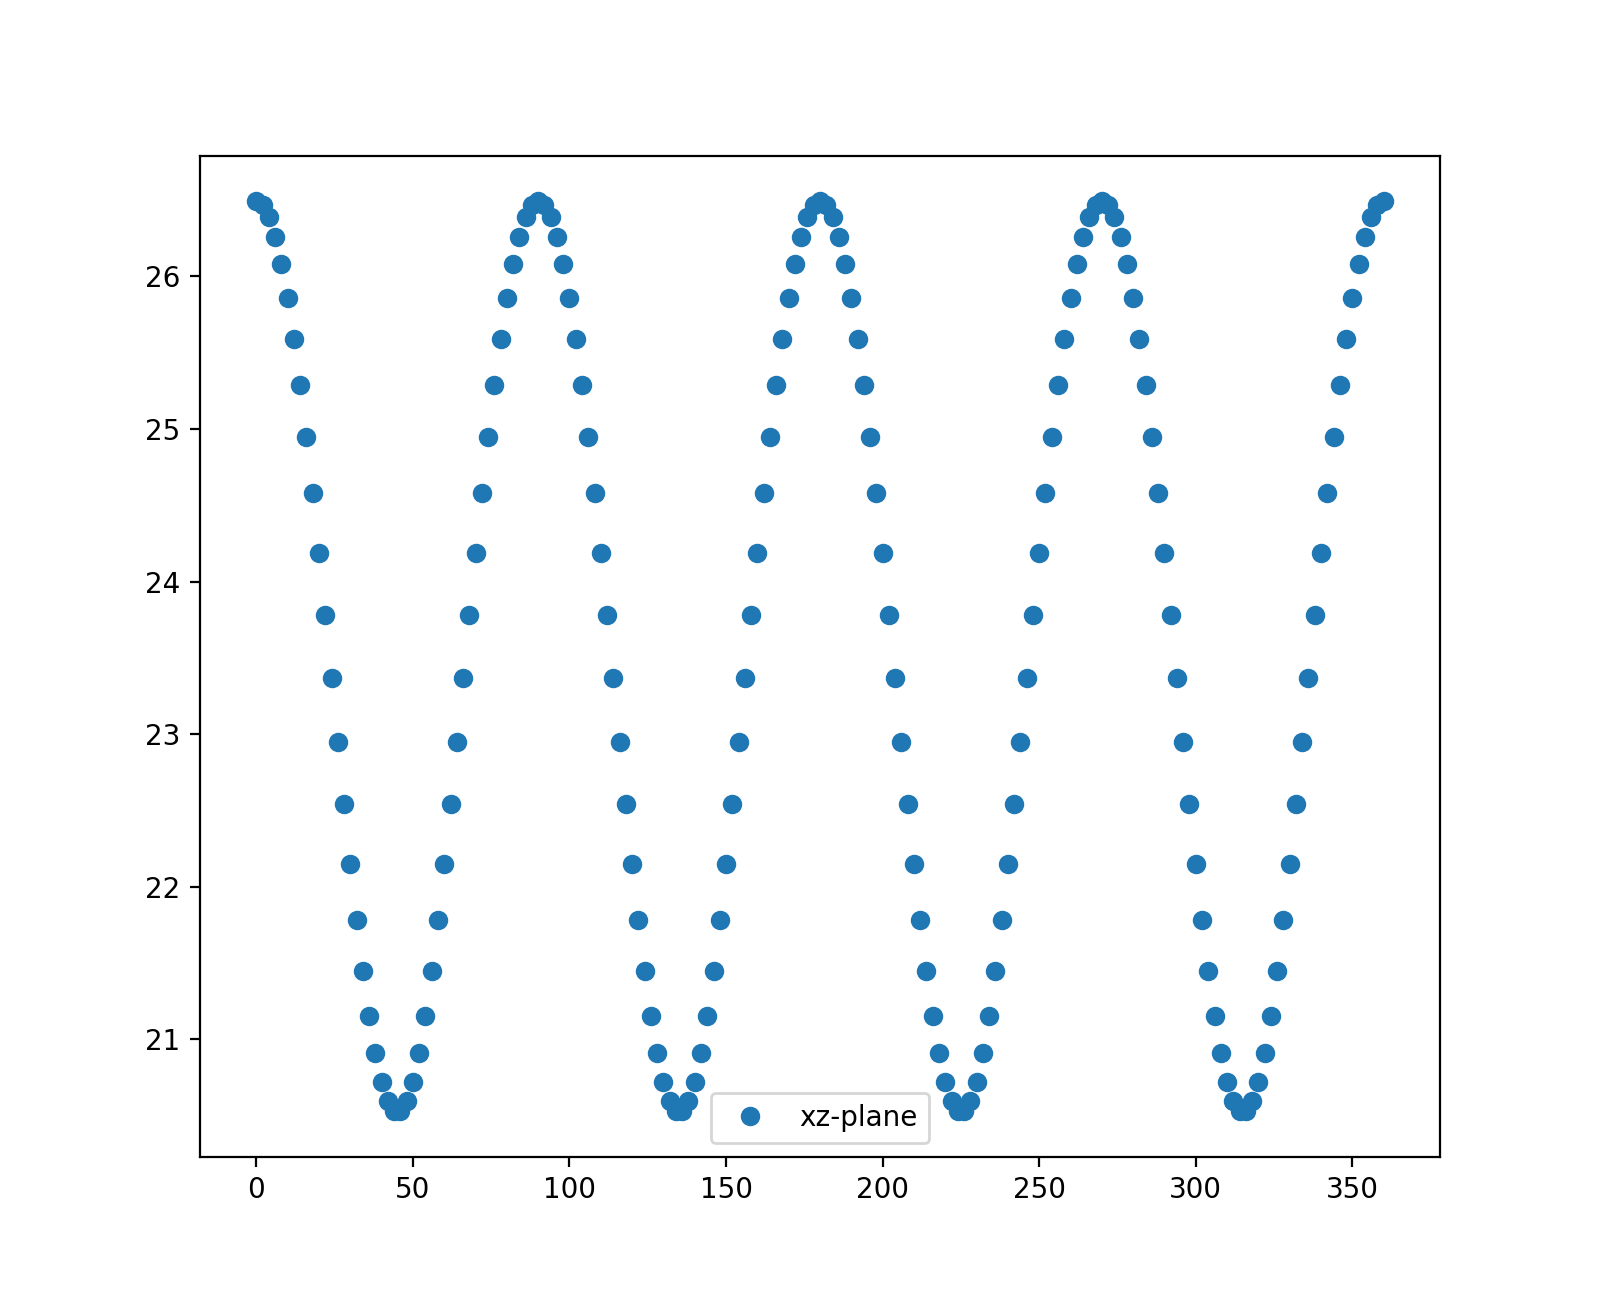

In [4]:
plt.rcParams["figure.figsize"] = (8,6.5)
plt.figure()
plt.plot(angle_,f0, ls="", marker="o",label="xz-plane")
plt.legend()
plt.show()

## Changing anisotropy axes

- v1Kc = (0.707,0.707,0)
- v2Kc = (0,0,1)

In [5]:
angle = 45
sample.v1Kc = (np.sin(angle*np.pi/180),np.sin(angle*np.pi/180),0)
sample.v2Kc = (0,0,1)

In [6]:
angle_ = np.linspace(0,360,181)
Bext = 300e-3
f0 = []
exp = tx.create_experimental_setup(sample,name="xz-plane")

for angle in angle_:
    sample.mag = tx.vectorfields.homogeneous(sample.xyz, angle, 0)
    exp.Bext = Bext*tx.vectorfields.homogeneous(sample.xyz, angle, 0)
    dispersion = exp.eigenmodes(num_cpus=-1,num_modes=2,k=0,save_modes=False,verbose=False)
    f0.append(dispersion.iloc[0]["f0 (GHz)"])

<IPython.core.display.Javascript object>


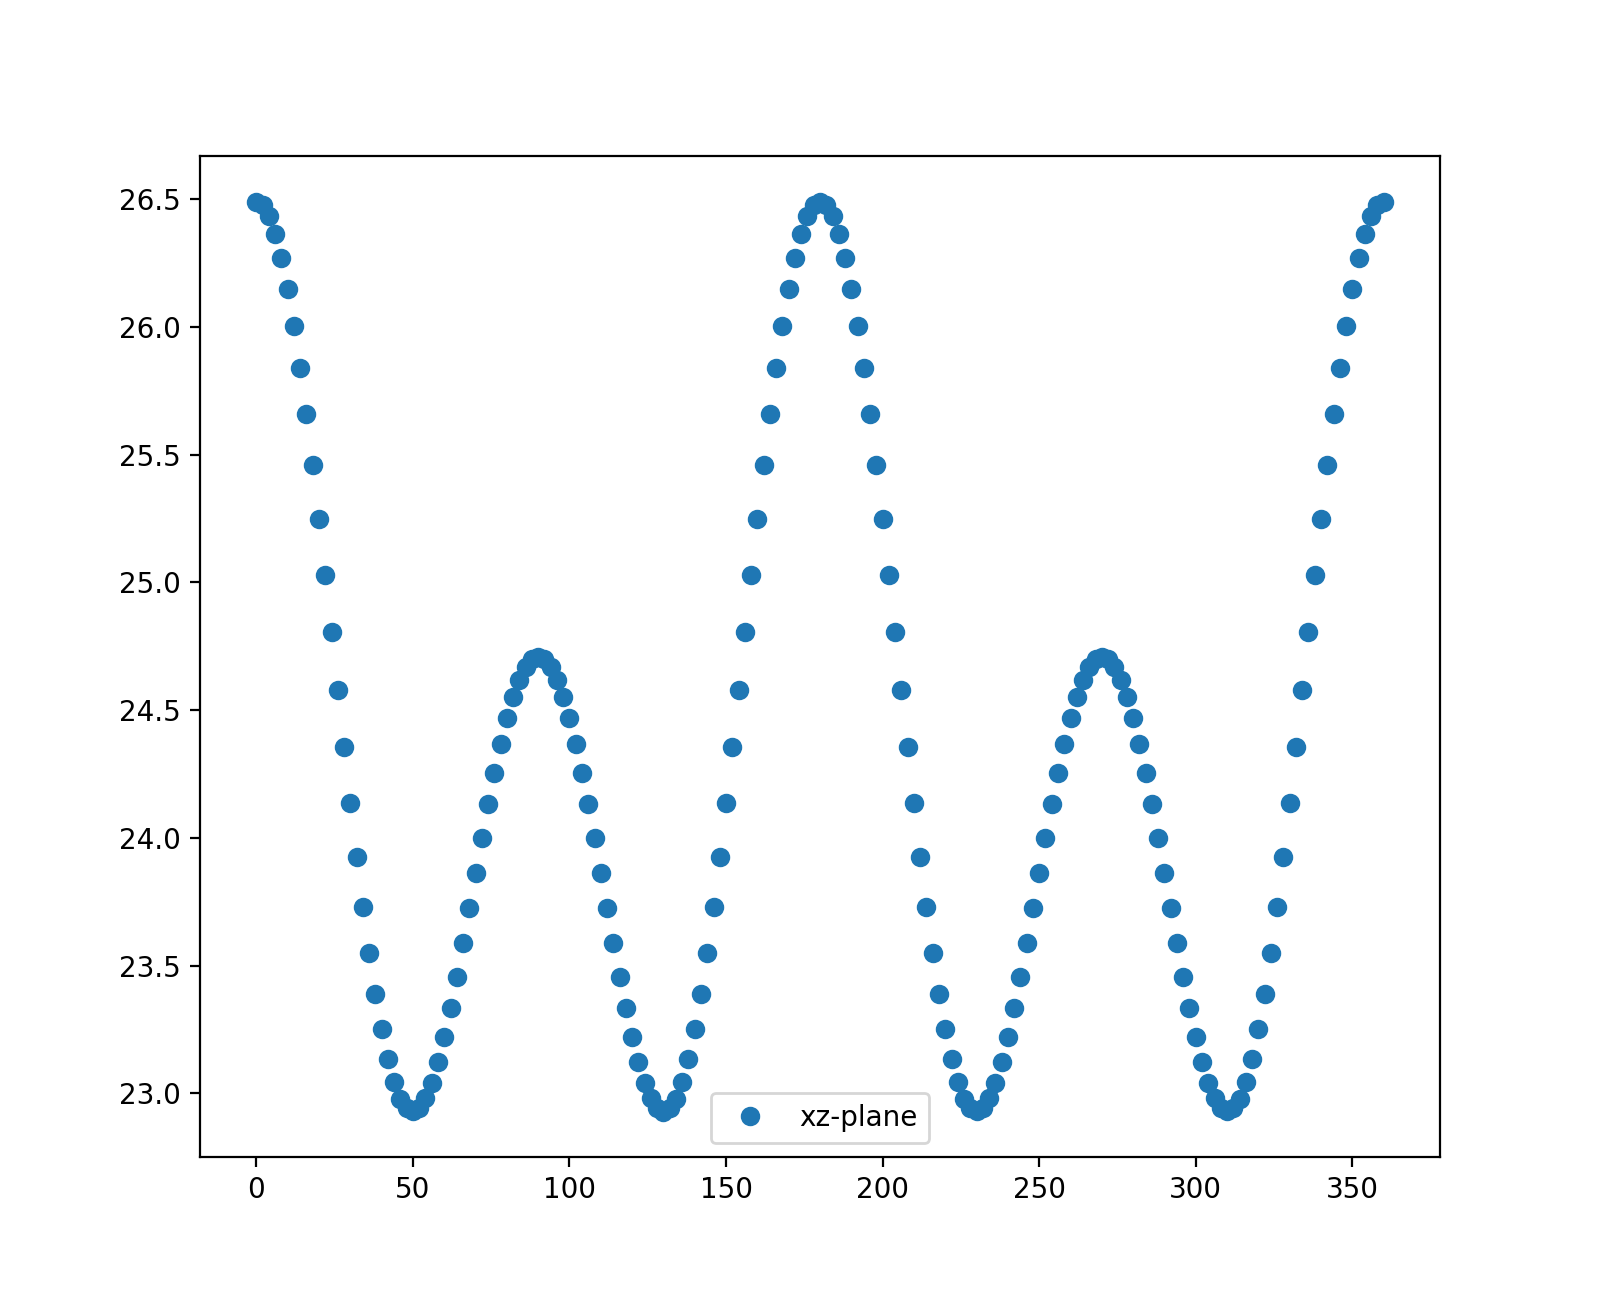

In [7]:
plt.rcParams["figure.figsize"] = (8,6.5)
plt.figure()
plt.plot(angle_,f0, ls="", marker="o",label="xz-plane")
plt.legend()
plt.show()